# Trabajo práctico integrador.

## Análisis de datos.

### Datos de distintas canciones en Spotify

### Análisis exploratorio inicial

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, f_regression, SelectKBest

In [2]:
# Set color palette
color = ['#1ED760', '#FAF5F5']
sns.set_palette(sns.color_palette(color))

In [3]:
# Load dataset from GitHub repository
df = pd.read_csv('https://raw.githubusercontent.com/ldidone/analisis_de_datos_CEIA_TP/main/data/data_playlist.csv')

In [4]:
# Show first 10 rows
df.head(10)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.524,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.597,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.452,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.748,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.913,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


In [5]:
# Define numeric vars
numeric = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']
useful_statistics = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
five_statistics = ['min', '25%', '50%', '75%', 'max']

In [6]:
# General description of each numeric var
df[numeric].describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,0.594188,0.100245,0.203376,-8.509339,0.098966,0.497321
std,0.338405,0.172036,0.253301,0.259921,0.177609,5.039488,0.104715,0.239615
min,0.000001,0.107000,0.009250,0.000000,0.024000,-29.601000,0.023400,0.033200
25%,0.037150,0.480000,0.423250,0.000000,0.094550,-10.173500,0.035900,0.297000
50%,0.244500,0.606000,0.631500,0.000010,0.129000,-7.270000,0.048750,0.483000
75%,0.678500,0.715750,0.804750,0.002245,0.264750,-5.097750,0.113000,0.684500
max,0.994000,0.986000,0.995000,0.967000,0.979000,-0.533000,0.721000,0.975000


In [7]:
# Describe dataset 5 numeric statistics
df[numeric].describe().loc[five_statistics]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
min,0.000001,0.10700,0.00925,0.000000,0.02400,-29.60100,0.02340,0.0332
25%,0.037150,0.48000,0.42325,0.000000,0.09455,-10.17350,0.03590,0.2970
50%,0.244500,0.60600,0.63150,0.000010,0.12900,-7.27000,0.04875,0.4830
75%,0.678500,0.71575,0.80475,0.002245,0.26475,-5.09775,0.11300,0.6845
max,0.994000,0.98600,0.99500,0.967000,0.97900,-0.53300,0.72100,0.9750


### Descripción de las variables.
Se identifican los tipos de datos de las variables. Además se clasifican en variables de entrada y de salida.

| Variable         | Tipo de dato        | Descripción                                                                                  | ¿Es informativa para un problema de clasificación? | Entrada o salida |
|------------------|---------------------|----------------------------------------------------------------------------------------------|----------------------------------------------------|------------------|
| acousticness     | Numérico (ordinal). | Indica el grado de acusticidad de una canción.                                               | Sí                                                | Entrada          |
| danceability     | Numérico (ordinal). | Indica que tan bailable es una canción.                                                      | Sí                                                 | Entrada          |
| energy           | Numérico (ordinal). | Indica el nivel de energía de una canción.                                                   | Sí                                                 | Entrada          |
| instrumentalness | Numérico (ordinal). | Indica qué tan instrumental es una canción.                                                  | Sí                                                 | Entrada          |
| key              | Categórico.         | Indica la tonalidad en la que se encuentra la canción.                                       | Sí (One Hot Enconding)                                                 | Entrada          |
| liveness         | Numérico (ordinal). | Indica qué tan "en vivo" es la canción.                                                      | Sí                                                 | Entrada          |
| loudness         | Numérico (ordinal). | Indica el volumen general de una pista en decibelios (dB)                                    | Sí                                                 | Entrada          |
| mode             | Categórico.         | Indica la modalidad (mayor o menor) de una canción. Contenido melódico.                      | Sí (One Hot Enconding).                                                | Entrada          |
| speechiness      | Numérico (ordinal). | Indica la proporción de discurso que hay en la canción.                                      | Sí                                                 | Entrada          |
| tempo            | Categórico. | El tempo general estimado de una pista en pulsaciones por minuto (BPM).                      | Sí (One Hot Enconding)                                                 | Entrada          |
| time_signature   | Categórico.         | El compás es una convención de notación para especificar cuántos tiempos hay en cada compás. | Sí (One Hot Enconding)                                                | Entrada          |
| valence          | Numérico (ordinal)  | Describe la positividad musical que transmite una canción.                                   | Sí                                                 | Entrada          |
| label            | Categórico.         | Indica si la canción es del gusto de la persona que tiene esta playlist activa               | No (ya que es la variable de salida)               | Salida           |

### Referencia:
- [Enlace de interés](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-analysis)

### Boxplots

In [8]:
df_numeric = df.drop(columns=["key", "mode", "tempo"])

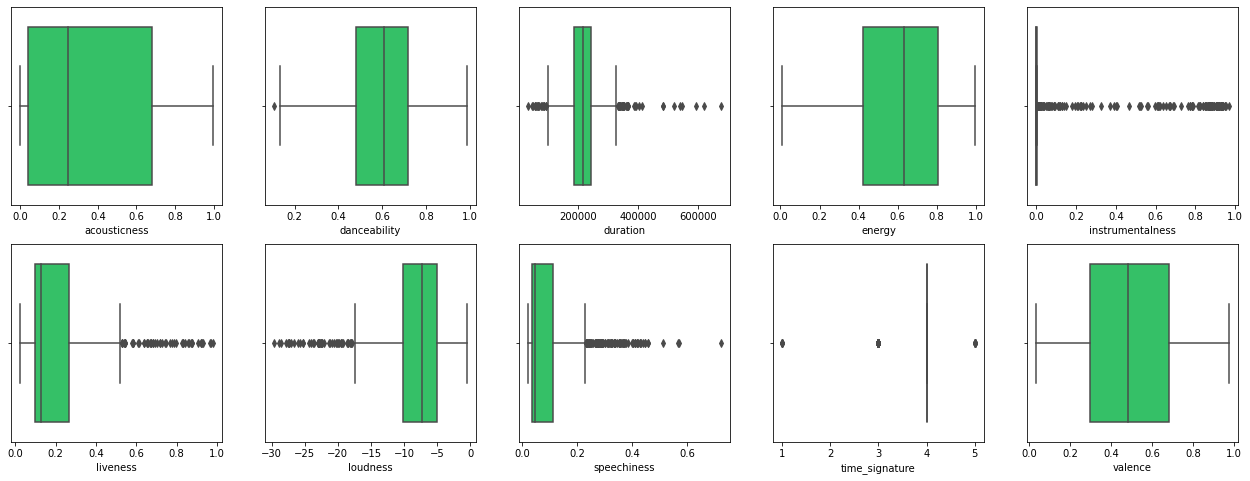

In [9]:
f, axes = plt.subplots(2, 5, figsize=(22, 8))
for ax, feature in zip(axes.flat, df_numeric.columns):
    sns.boxplot(x=df_numeric[feature], ax=ax)

### Outliers

No encontramos outliers totalmente aislados de los Box-Plots, por lo que decidimos mantenerlos para el análisis posterior.

c:\users\lucas\documents\especialización en inteligencia artificial de la uba\4. análisis de datos\repositorio propio\analisis_de_datos_ceia_tp\venv\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


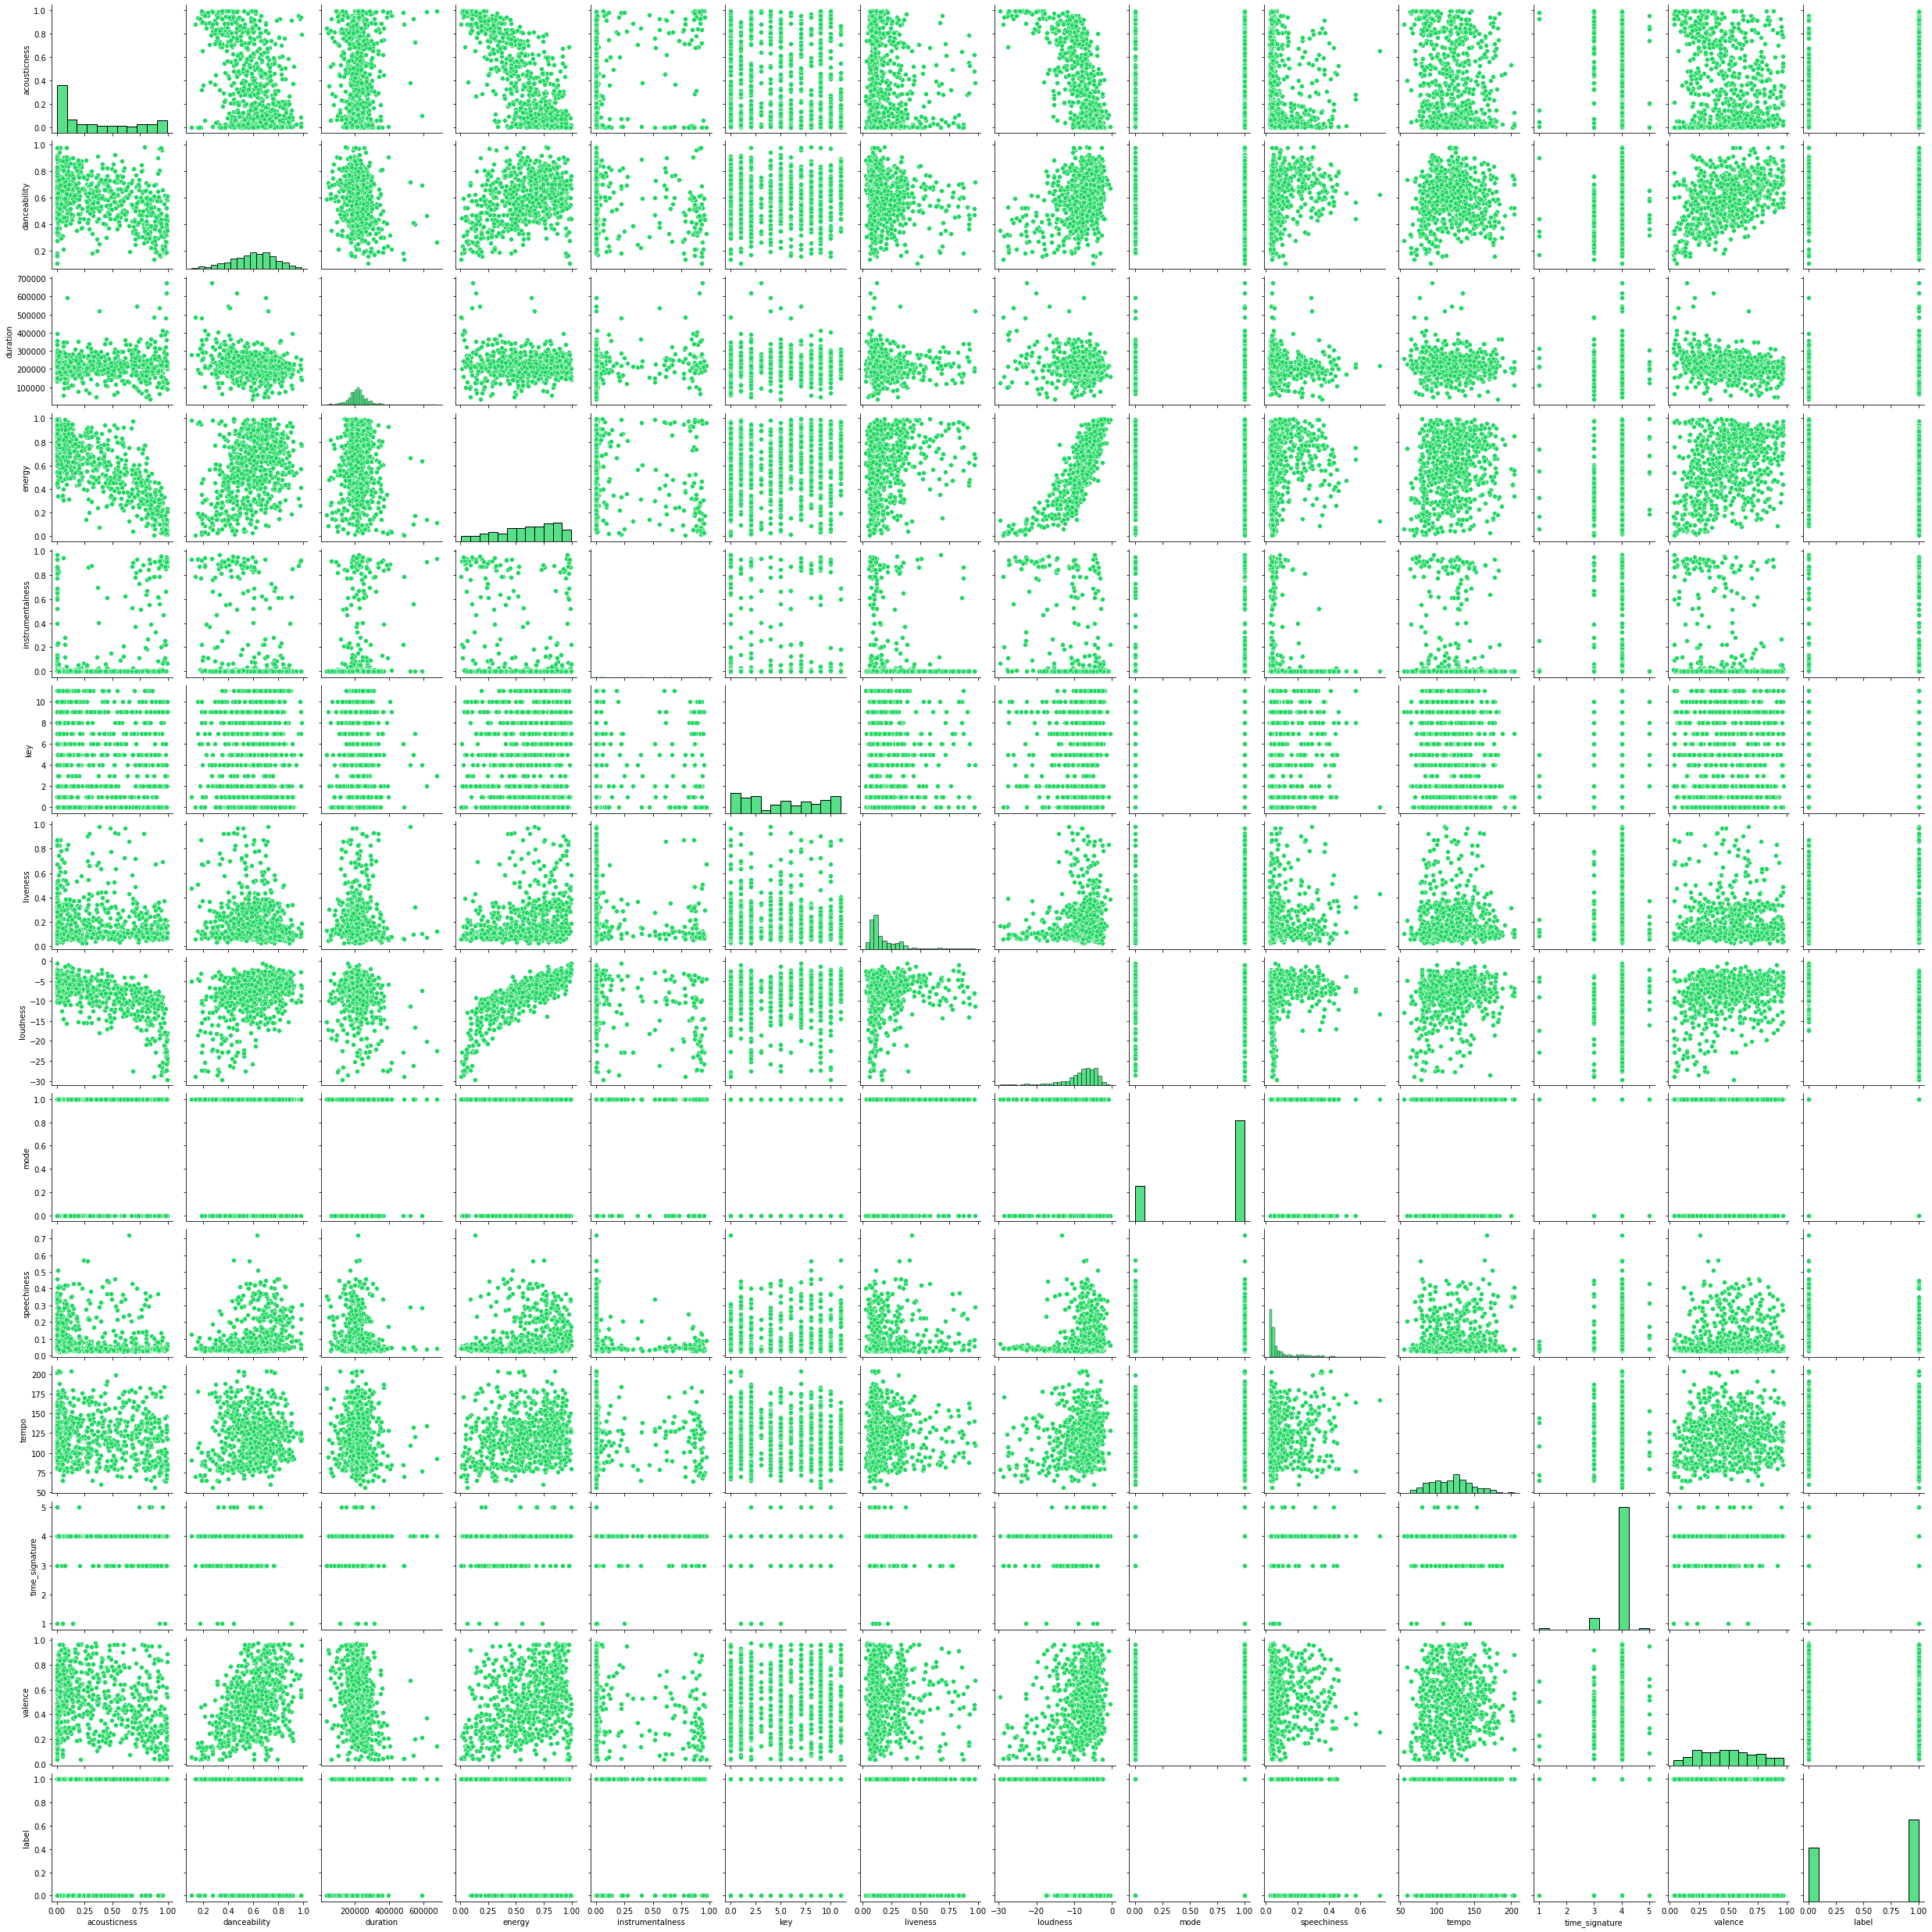

In [10]:
sns.pairplot(df, size=2.5) 

### Correlación

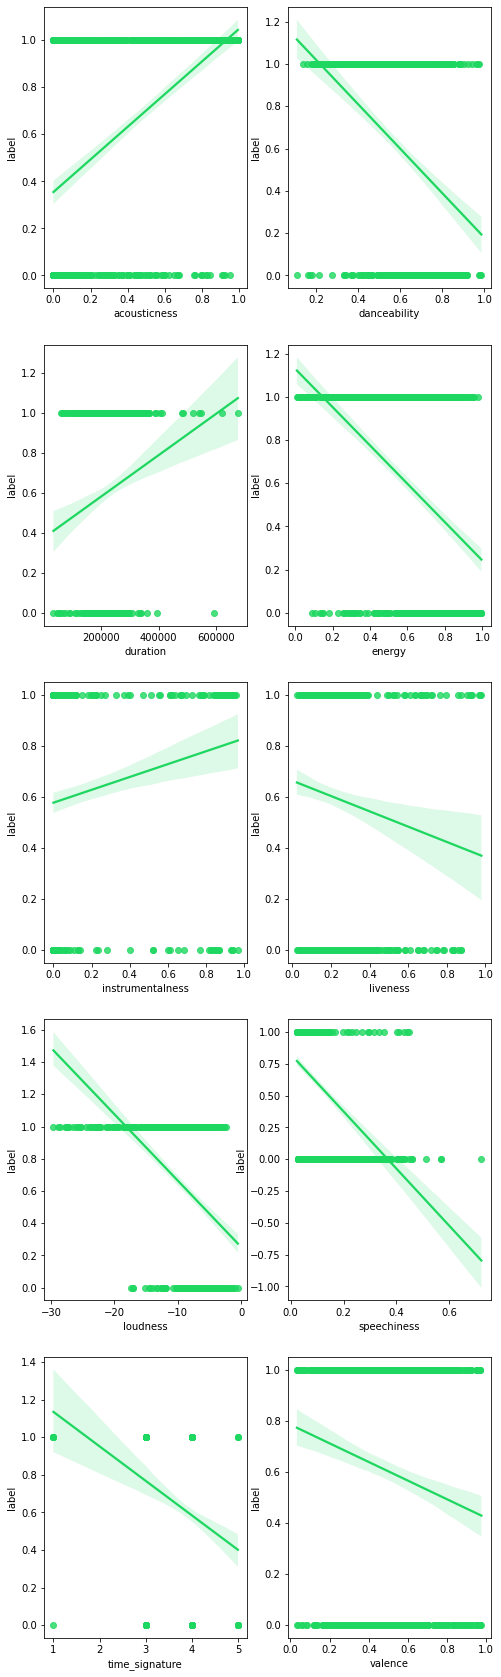

In [11]:
df_numeric_new = df_numeric.drop(columns=["label"])
value_y = df_numeric["label"]

f, axes = plt.subplots(5, 2, figsize=(8, 30))
for ax, feature in zip(axes.flat, df_numeric_new.columns):
    values = df_numeric_new[feature]
    sns.regplot(x=values, y=value_y, ax=ax)

#### No se observan gráficas similares (dado que "label" puede tomar valores de 0 o 1, es dificil encontrar relaciones lineales entre variables a simple vista)

### Matriz de correlación de Pearson:

<AxesSubplot:>

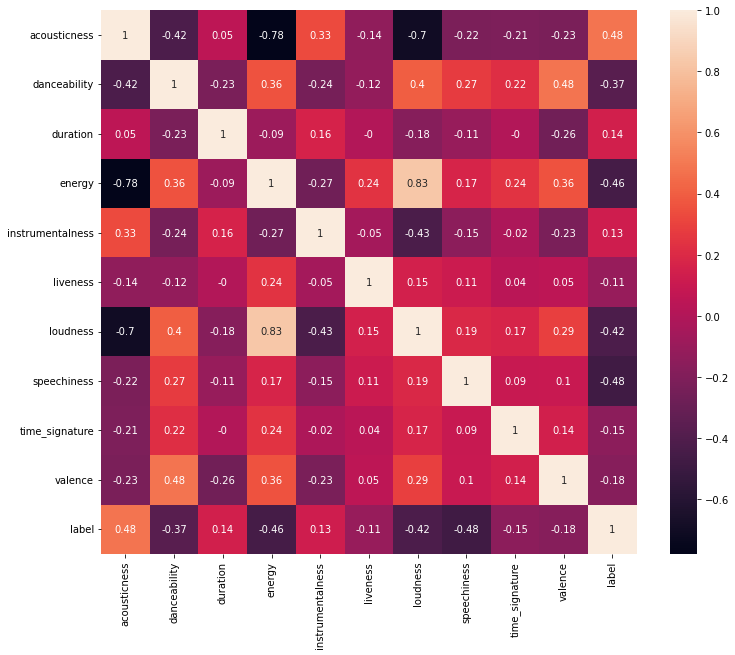

In [12]:
corr_mat_pearson = df_numeric.corr(method="pearson").round(2)
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(data=corr_mat_pearson, annot=True, ax=axes)

### Se observa para la variable de salida "label" una fuerte relación lineal entre "acousticness", "duration" e "instrumentalness".

### Graficamos la relación de las distintas features con la variable de salida "label", utilizando informacion mutua

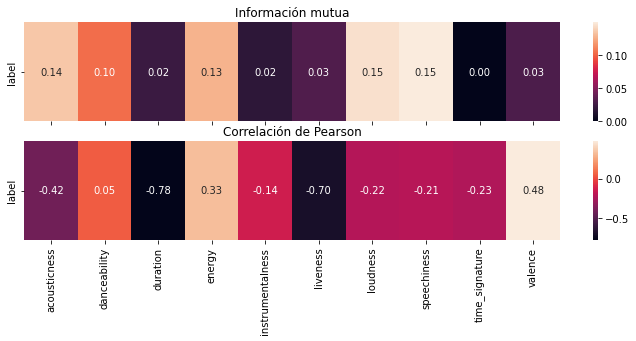

In [13]:
df_numeric_new = df_numeric.drop(columns=["label"])

mutual_info = mutual_info_regression(df_numeric_new, value_y)
fig, ax = plt.subplots (2, figsize=(12, 4))
sns.heatmap([mutual_info], ax=ax[0], annot=True, fmt=".2f")
ax[0].set_title("Información mutua")
ax[0].set_xticklabels([])
ax[0].set_yticklabels(["label"])

sns.heatmap([corr_mat_pearson.iloc[0][1:]], ax=ax[1], annot=True, fmt=".2f")
ax[1].set_title("Correlación de Pearson")
ax[1].set_xticklabels(df_numeric_new.columns, rotation=90)
ax[1].set_yticklabels(["label"])
print()



### Como podemos observar, no hay ninguna relación lineal fuerte entre las features y la variabled de salida "label", a excepción de acousticness para el caso de utilizar el coeficiente de relación de Pearson.